In [4]:
#1
#시, 태그 데이터 불러오기
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import pickle

with open('C:\DeepLearing\Robot_KSG\Softmax_Regression\poems_token_MLP', 'rb') as fr:
    poems_token = pickle.load(fr)
with open('C:\DeepLearing\Robot_KSG\Softmax_Regression\poemIndex_intTag', 'rb') as fr:
    poems_tag = pickle.load(fr)
with open('C:\DeepLearing\Robot_KSG\Softmax_Regression\\tagList', 'rb') as fr:
    tagList = pickle.load(fr) #정수-태그 데이터

print(poems_token[:2])
print(poems_tag)
print(tagList)

[['선생', '서덕출', '학교', '마한', '학생', '집', '선', '말', '선생', '동무', '서넛', '놓고', '가르치는', '선생'], ['노래', '짓밟힌', '무리', '흘린', '핏', '방울', '방울', '이지', '심', '흘러', '흘러', '폭발', '새', '화산', '새', '세기', '화산', '북방', '솟은', '새', '히말라야', '산', '소비에트', '공화국', '낡은', '제도', '골짜기', '무너졌다', '온', '세계', '바다', '끓는', '소비에트', '공화국', '거룩', '탄생', '여자', '라나', '힘', '걸음', '걸음', '열네', '해', '맞는', '날', '아침', '맑은', '햇빛', '날려라', '붉은', '깃발', '울려라', '승리', '쇠북', '만국', '승냥이', '갈며', '떤다', '떤다', '사자', '새', '화산', '아들', '건장', '무', '리야', '원수', '향', '소리', '동무', '불러', '소리', '한층', '만세', '만세', '손', '망치', '고우리', '발', '바퀴', '굴', '린다', '어깨', '총', '메', '고우리', '머리', '위엔', '새', '태양', '과학', '빛난다이', '리하', '건설', '쉬일', '날', '고우리', '무장', '원수', '물리', '만다', '망치', '힘', '있게', '내려', '바퀴', '빨리', '태양', '빛나게', '내리', '걸음', '시가', '고우리', '팔다리', '힘줄']]
0        6
1        9
2       12
4        9
6       14
        ..
4808    12
4835     1
4851     0
4852     4
4864    15
Name: tags, Length: 468, dtype: object
['기쁨', '즐거움', '사랑1', '사랑2', '희망', '활기', '순수', '잔잔', '슬픔', '

In [27]:
print(type(str(poems_token[0])))

<class 'str'>


In [6]:
type(poems_tag)

pandas.core.series.Series

In [13]:
str(poems_token[0])

"['선생', '서덕출', '학교', '마한', '학생', '집', '선', '말', '선생', '동무', '서넛', '놓고', '가르치는', '선생']"

In [48]:
a = str(poems_token[0]).replace("[","").replace("]","").replace("'","")
a

'선생, 서덕출, 학교, 마한, 학생, 집, 선, 말, 선생, 동무, 서넛, 놓고, 가르치는, 선생'

In [5]:
#2
#DataFrame으로 변환(머신러닝 전 데이터 분석용)
poems_tokens = []
for poem in poems_token:
    poems_tokens.append(str(poem).replace("[","").replace("]","").replace("'",""))

poem_tag = pd.DataFrame(poems_tokens, columns = ['poem'])
poem_tag['tag'] = pd.Series(poems_tag)
poem_tag.dropna(axis=0, inplace=True) #태그 없는 데이터 제거

poem_tag[:5]

,poem,tag
0,"선생, 서덕출, 학교, 마한, 학생, 집, 선, 말, 선생, 동무, 서넛, 놓고, ...",6
1,"노래, 짓밟힌, 무리, 흘린, 핏, 방울, 방울, 이지, 심, 흘러, 흘러, 폭발,...",9
2,"깨끗한, 서나, 몸부림, 쳐도, 소용, 없다, 공간, 들려오는, 공포, 소리, 좁은...",12
4,"찬, 새벽, 고동, 잠들은, 이을, 흔들어, 눈, 사람, 잠, 요란, 히든, 밤, ...",9
6,"만가, 불안, 언덕, 로나, 바람, 날려, 간다, 죽, 행복, 차단, 아릴, 수, ...",14


In [6]:
poem_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 4864
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   poem    468 non-null    object
 1   tag     468 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


In [7]:
print('중복을 제외한 샘플 수 : {}'.format(poem_tag['poem'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(poem_tag['tag'].nunique()))

중복을 제외한 샘플 수 : 468
중복을 제외한 주제의 수 : 17


<AxesSubplot:>

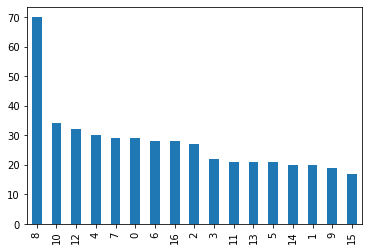

In [8]:
poem_tag['tag'].value_counts().plot(kind='bar')

In [9]:
poem_tag['tag'].value_counts()

8     70
10    34
12    32
4     30
7     29
0     29
6     28
16    28
2     27
3     22
11    21
13    21
5     21
14    20
1     20
9     19
15    17
Name: tag, dtype: int64

In [10]:
poem_tag['poem'].iloc[0:5] 

0    선생, 서덕출, 학교, 마한, 학생, 집, 선, 말, 선생, 동무, 서넛, 놓고, ...
1    노래, 짓밟힌, 무리, 흘린, 핏, 방울, 방울, 이지, 심, 흘러, 흘러, 폭발,...
2    깨끗한, 서나, 몸부림, 쳐도, 소용, 없다, 공간, 들려오는, 공포, 소리, 좁은...
4    찬, 새벽, 고동, 잠들은, 이을, 흔들어, 눈, 사람, 잠, 요란, 히든, 밤, ...
6    만가, 불안, 언덕, 로나, 바람, 날려, 간다, 죽, 행복, 차단, 아릴, 수, ...
Name: poem, dtype: object

In [24]:
#3.1
#유효 데이터 분리 후 훈련 데이터 / 테스트 데이터 분류
train_poem = poem_tag['poem'].iloc[0:401]
train_tag = poem_tag['tag'].iloc[0:401]
test_poem = poem_tag['poem'].iloc[401:468]
test_tag = poem_tag['tag'].iloc[401:469]

max_words = 7000 #max_words: 사용할 단어 최대 개수(빈도순, 전체 단어 약 17000개)
num_tag = 17

poem_tag[:5]

,poem,tag
0,"선생, 서덕출, 학교, 마한, 학생, 집, 선, 말, 선생, 동무, 서넛, 놓고, ...",6
1,"노래, 짓밟힌, 무리, 흘린, 핏, 방울, 방울, 이지, 심, 흘러, 흘러, 폭발,...",9
2,"깨끗한, 서나, 몸부림, 쳐도, 소용, 없다, 공간, 들려오는, 공포, 소리, 좁은...",12
4,"찬, 새벽, 고동, 잠들은, 이을, 흔들어, 눈, 사람, 잠, 요란, 히든, 밤, ...",9
6,"만가, 불안, 언덕, 로나, 바람, 날려, 간다, 죽, 행복, 차단, 아릴, 수, ...",14


In [26]:
a = test_tag.index
a

Int64Index([401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
            414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
            427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
            440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
            453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
            466, 467],
           dtype='int64')

In [25]:
#3.2
#케라스 토크나이저로 DTM 생성(4가지 모드 사용 가능)
def prepare_data(train_data, test_data, mode):
    t = Tokenizer(num_words = max_words)
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode)
    X_test = t.texts_to_matrix(test_data, mode=mode)
    
    return X_train, X_test, t.index_word, mode

modes = ['binary', 'count', 'tfidf', 'freq']

X_train, X_test, index_to_word, mode = prepare_data(train_poem, test_poem, modes[0])
y_train = to_categorical(train_tag, num_tag)
y_test = to_categorical(test_tag, num_tag)

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))
print("빈도수 상위 1위 단어 : {}" .format(index_to_word[1]))
print("빈도수 상위 1위 단어 : {}" .format(index_to_word[max_words-1]))

훈련 샘플 본문의 크기 : (401, 7000)
훈련 샘플 레이블의 크기 : (401, 17)
테스트 샘플 본문의 크기 : (67, 7000)
테스트 샘플 레이블의 크기 : (67, 17)
빈도수 상위 1위 단어 : 내
빈도수 상위 1위 단어 : 닯


In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [37]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
y_train[0].shape

(17,)

In [32]:
type(y_train)

numpy.ndarray

In [21]:
#4.1
#MLP 모델 설계 + 학습 + 자체평가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential() 
model.add(Dense(128, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) #과적합 방지
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
#modle.add(Dense()) 후에 적절한 층 추가해서 DNN로 변환(딥러닝)
model.add(Dense(num_tag, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_split=0.1)

score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print(mode+"모드의 테스트 정확도:", score[1])

Train on 360 samples, validate on 41 samples
Epoch 1/50
360/360 [==============================] - 1s 1ms/sample - loss: 2.8305 - accuracy: 0.0667 - val_loss: 2.8084 - val_accuracy: 0.1220
Epoch 2/50
360/360 [==============================] - 0s 256us/sample - loss: 2.6365 - accuracy: 0.3111 - val_loss: 2.7815 - val_accuracy: 0.1220
Epoch 3/50
360/360 [==============================] - 0s 231us/sample - loss: 2.4495 - accuracy: 0.4750 - val_loss: 2.7567 - val_accuracy: 0.1220
Epoch 4/50
360/360 [==============================] - 0s 236us/sample - loss: 2.2516 - accuracy: 0.6000 - val_loss: 2.7333 - val_accuracy: 0.1220
Epoch 5/50
360/360 [==============================] - 0s 248us/sample - loss: 2.0670 - accuracy: 0.7167 - val_loss: 2.7141 - val_accuracy: 0.1463
Epoch 6/50
360/360 [==============================] - 0s 258us/sample - loss: 1.9011 - accuracy: 0.7500 - val_loss: 2.6992 - val_accuracy: 0.1463
Epoch 7/50
360/360 [==============================] - 0s 222us/sample - loss: 1.7

In [22]:
#4.2
#모델 평가(새로운 데이터로)

#Softmax Regression(Practice)문서 참조
arr = model.predict(X_test, batch_size=1)
arr[1]

array([0.10920485, 0.01998959, 0.01712158, 0.01334469, 0.04607554,
       0.01176431, 0.04360112, 0.01264667, 0.11799812, 0.01236814,
       0.11911298, 0.06142206, 0.2825328 , 0.0345719 , 0.04209147,
       0.01042603, 0.04572814], dtype=float32)

In [17]:
test_poem

2498    산, 봄, 산, 서사, 노, 픠, 잇네, 산, 서우, 적은, 새, 요산, 지네, 치...
2499    산, 표정, 인자, 요산, 니지, 인자, 산, 유, 달리, 좋아한다, 런, 이유, ...
2543    삼일, 어젯날, 어머니, 옷, 음식, 갖, 다주, 즐겁게, 웃음, 늘, 몸, 떨며,...
2563    상쾌, 아침, 무연, 벌, 놓은, 집, 또는, 밤새, 왔는지, 아지, 비친, 개지,...
2614    생, 길이, 그리, 한밤, 자고, 눈가, 젖었, 울었, 인생, 티끌, 허무인, 내,...
                              ...                        
4808    황소, 윤곤강, 바보, 미련, 둥이, 꿀꺽, 참고, 우는, 나치, 성미, 착한, 탓...
4835       휘장, 부르, 안, 꽃, 소녀, 당사, 수, 놓을, 바람, 가만, 가만히, 봤, 소
4851    희망, 꽃술, 바람, 숲, 사뭇, 짖, 습, 대가, 오신, 기별, 아치, 맛, 자락...
4852    희망, 꼬, 부러, 진, 소나무, 꽃, 훨쩍, 피었다, 붉은, 아침, 오른, 살찐,...
4864    흰, 구, 름, 가을, 대공, 흰, 구름, 천리만리, 흰, 구름, 산, 넘고, 강,...
Name: poem, Length: 67, dtype: object

In [34]:
test_poem[test_poem.index[4]]

'경, 인제, 송이, 올케, 왔, 객, 해하, 얼골, 보소, 마음, 무, 함, 돌혀, 무참, 할시고, 남, 하얏, 그림자, 밤, 살, 지니, 인제, 살, 먹어, 짐, 앙탈, 오해, 세, 쇠, 날, 내년, 하지, 그해, 나하, 본적, 인제, 머리털, 세, 이러, 할시, 고가, 소서, 소서, 밤, 소서, 겨레, 나라, 싹싹, 씨, 소서, 업, 새는, 밤, 일가, 라이, 소원, 스리, 오물, 들고, 더러, 국, 씨, 쳐서, 업도, 록, 하게, 합세, 닙, 은동, 무, 손, 잡고, 오락가락, 말굽, 밋헤, 밟히는, 서울, 서얼, 경황, 잇다, 리오, 서울, 명, 전국, 치면, 천만, 상이, 피난민, 오늘, 모양, 일가, 술, 업다, 국, 업다, 말, 오이, 생각, 생각, 밤, 몰랏, 슬사, 긴, 한숨, 휘, 쉬, 미, 다지, 열, 쓸쓸히, 개인, 하늘, 별도, 총총, 라일, 구, 오일, 일월, 미, 발표'